In [284]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [285]:
#reading the dataset

data=pd.read_csv('/content/drive/MyDrive/Projects/INEURON/Restaurant Rating Prediction/zomato.csv')

In [286]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# EXPLORATORY DATA ANALYSIS

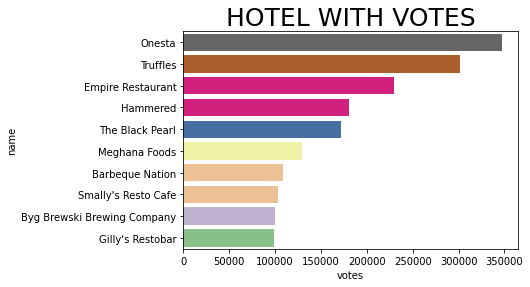

In [288]:
# 1. Bar plot for hotes with high votes

highVotes=data[['name','votes']].groupby(by='name').sum()[['votes']].sort_values(by='votes',ascending=False).reset_index()
ax=sns.barplot(data=highVotes[:10],y='name',x='votes',palette='Accent_r')
ax=plt.title('HOTEL WITH VOTES',size=25)

#OBSERVATION
1. Hotel Onesta,Truffles, Empire Restaurant which has high number of votes

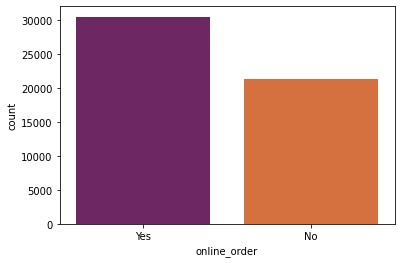

In [289]:
#2. count plot

ax=sns.countplot(x=data['online_order'],palette='inferno')

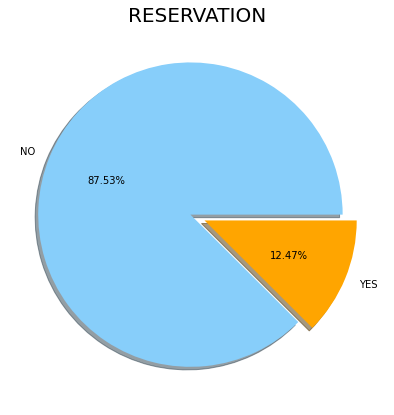

In [290]:
# 3. pie chat for reservation

counts=data['book_table'].value_counts()
label=['NO','YES']

fig=plt.figure(figsize=(10,7))
ax=plt.pie(counts,labels=label,autopct='%1.2f%%',explode=(0.05,0.05),shadow=True,colors=['lightskyblue','orange'])
ax=plt.title('RESERVATION',size=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

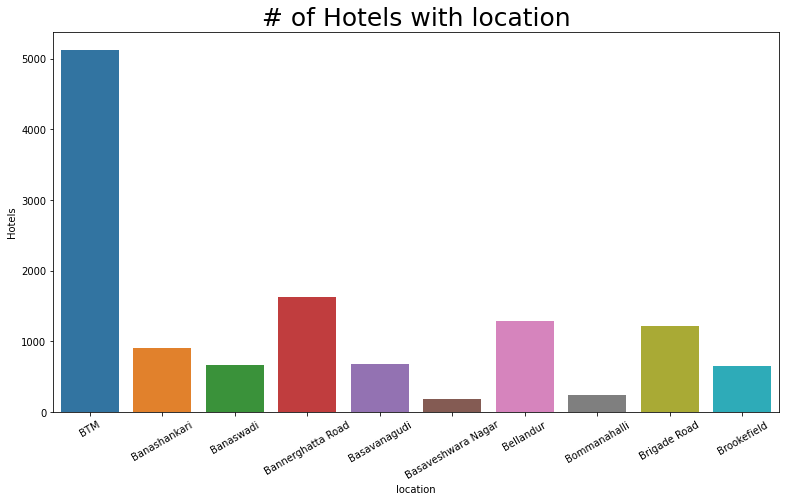

In [291]:
#4. Hotels in location

Location=data[['location','name']].groupby(by=['location']).size().reset_index()
Location.rename(columns={0:'Hotels'},inplace=True)

fig=plt.figure(figsize=(13,7))
ax=plt.title('# of Hotels with location',size=25)
ax=sns.barplot(data=Location[:10],y='Hotels',x='location')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

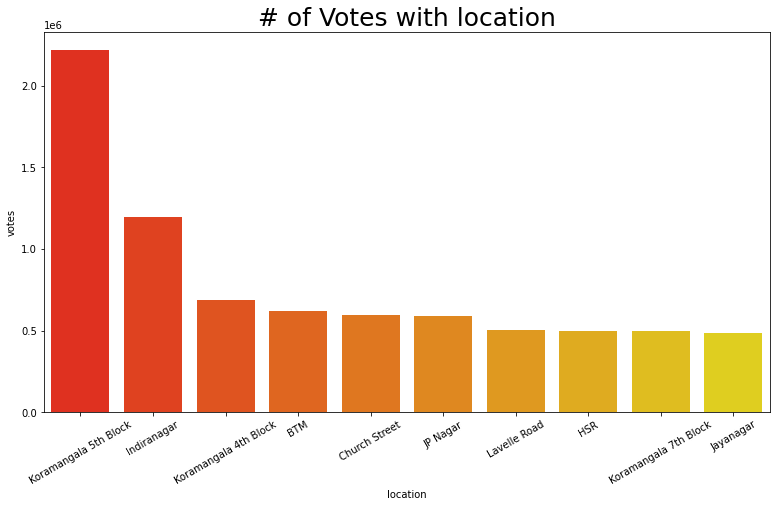

In [292]:
#5.

Location=data[['location','votes']].groupby(by=['location']).sum()[['votes']].sort_values(by='votes',ascending=False).reset_index()
Location.rename(columns={0:'votes'},inplace=True)

fig=plt.figure(figsize=(13,7))
ax=plt.title('# of Votes with location',size=25)
ax=sns.barplot(data=Location[:10],y='votes',x='location',palette='autumn')
plt.xticks(rotation=30)

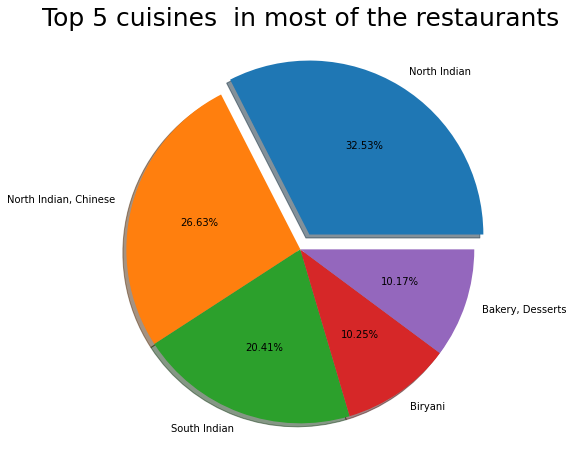

In [293]:
#6. 
#Top 5 cuisines mostly available in Bangaluru restaurants
#Plotting pie chart

cuisines=data.cuisines.value_counts()
cuisines_values=data.cuisines.value_counts().index

fig=plt.figure(figsize=(16,8))
ax=plt.pie(cuisines[:5],labels=cuisines_values[:5],autopct='%1.2f%%',explode=(0.1,0,0,0,0),shadow=True)
ax=plt.title("Top 5 cuisines  in most of the restaurants", size = 25)



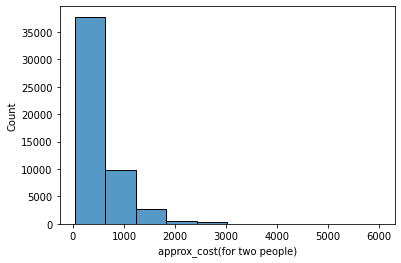

In [294]:
#7. Average cost of two people

#data['approx_cost(for two people)'].astype(float)

data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(',','')
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(float)

ax=sns.histplot(data['approx_cost(for two people)'],bins=10)

In [295]:
data['approx_cost(for two people)'].mean()

555.4315664479959

min of 555rs is enough for dining in most of the hotel


# FEATURE ENGINEERING

In [296]:
#checking the columns

data.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [297]:
#removing unwanted columns

data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [298]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [299]:
data.drop(['url','address','name','phone','menu_item','rest_type','listed_in(city)','location','cuisines'],axis=1,inplace=True)

In [300]:
#Renaming the column

data.rename(columns={'approx_cost(for two people)':'approx_cost'},inplace=True)
data.rename(columns={'listed_in(type)':'listed_in'},inplace=True)

In [301]:
data.head()

,online_order,book_table,rate,votes,dish_liked,approx_cost,reviews_list,listed_in
0,Yes,Yes,4.1/5,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Yes,No,4.1/5,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,Yes,No,3.8/5,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,No,No,3.7/5,88,Masala Dosa,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,No,No,3.8/5,166,"Panipuri, Gol Gappe",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51717 non-null  object 
 1   book_table    51717 non-null  object 
 2   rate          43942 non-null  object 
 3   votes         51717 non-null  int64  
 4   dish_liked    23639 non-null  object 
 5   approx_cost   51371 non-null  float64
 6   reviews_list  51717 non-null  object 
 7   listed_in     51717 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.2+ MB


In [303]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [304]:
#Checking Duplicates

data.duplicated().sum()

16009

In [305]:
#Removing duplicates

data.drop_duplicates(inplace=True)

In [306]:
data.shape

(35708, 8)

In [307]:
#rate columns

data.isnull().sum()

online_order        0
book_table          0
rate             1374
votes               0
dish_liked      15146
approx_cost       228
reviews_list        0
listed_in           0
dtype: int64

In [308]:
#replacing negative sign as 0 in rate column

data.loc[data['rate']=='-','rate']=0.0

In [309]:
#replacing new with nan

data.loc[data['rate']=='NEW','rate']=np.nan

In [310]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', 0.0, '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [311]:
#getting first values

data['rate']=data['rate'].str.findall(('\d+\.\d*'))

In [312]:
data['rate']=data['rate'].str[0]


In [313]:
#changing column rate dtype as float

data['rate']=data.rate.astype(float)

In [314]:
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [315]:
#modifying reviews_lsit as overall reviews

data['reviews_list']=data['reviews_list'].str.findall(('\d+\.\d+'))
data['reviews_list']=data['reviews_list'].str[0]

#Here the values are non rated which means they dint give any reviews 
#So we give this nan values as 0.0 reviews

data.reviews_list.fillna(value=0.0,inplace=True)

#renaming the column

data.rename(columns={'reviews_list':'Overall_review'},inplace=True)

data.head()

,online_order,book_table,rate,votes,dish_liked,approx_cost,Overall_review,listed_in
0,Yes,Yes,4.1,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800.0,4.0,Buffet
1,Yes,No,4.1,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800.0,4.0,Buffet
2,Yes,No,3.8,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800.0,3.0,Buffet
3,No,No,3.7,88,Masala Dosa,300.0,4.0,Buffet
4,No,No,3.8,166,"Panipuri, Gol Gappe",600.0,4.0,Buffet


In [316]:
#Fill the missing values 


data['rate'].fillna(data['rate'].median(),inplace=True)
#data['rest_type'].fillna(data['rest_type'].mode()[0],inplace=True)
data['approx_cost'].fillna(data['approx_cost'].mean(),inplace=True)

In [317]:
#missing values in dish_likes is more than 60% of data
#so we r dropping it

data.drop(columns='dish_liked',inplace=True)

In [318]:
#changing the dtypes

data['online_order']=data['online_order'].astype('category')
data['book_table']=data['book_table'].astype('category')
data['listed_in']=data['listed_in'].astype('category')
data['Overall_review']=data['Overall_review'].astype('float')


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35708 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   online_order    35708 non-null  category
 1   book_table      35708 non-null  category
 2   rate            35708 non-null  float64 
 3   votes           35708 non-null  int64   
 4   approx_cost     35708 non-null  float64 
 5   Overall_review  35708 non-null  float64 
 6   listed_in       35708 non-null  category
dtypes: category(3), float64(3), int64(1)
memory usage: 1.5 MB


In [320]:
data.describe()

,rate,votes,approx_cost,Overall_review
count,35708.000000,35708.000000,35708.000000,35708.000000
mean,3.737980,387.907780,617.851945,3.441092
std,0.437106,944.076862,467.012877,1.411412
min,1.800000,0.000000,40.000000,0.000000
25%,3.500000,20.000000,300.000000,3.000000
50%,3.800000,78.000000,500.000000,4.000000
75%,4.000000,319.250000,750.000000,5.000000
max,4.900000,16832.000000,6000.000000,5.000000


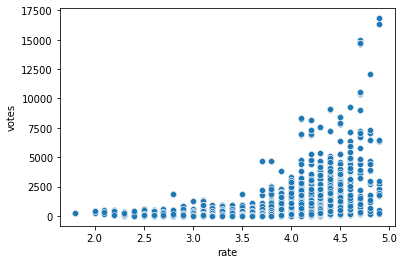

In [321]:
#ploting scater plot for rate and votes
ax=sns.scatterplot(data=data,x='rate',y='votes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


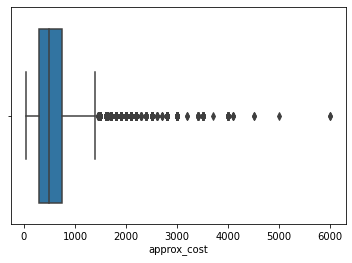

In [322]:
ax=sns.boxplot(data['approx_cost'])

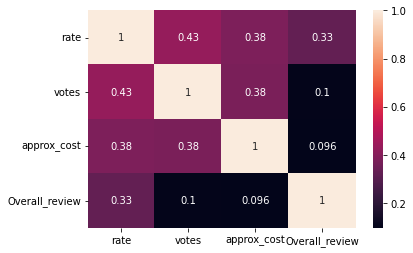

In [323]:
#heatmap

corr=data.corr()
ax=sns.heatmap(corr,annot=True)

In [324]:
#handling outlier

data.rate=sorted(data.rate)

Q1=data.rate.quantile(0.25)
Q3=data.rate.quantile(0.75)

IQR= Q3-Q1

data = data[(data.rate >= Q1 - 1.5*IQR) & (data.rate <= Q3 + 1.5*IQR)]

In [325]:
data.votes=sorted(data.votes)

Q1=data.votes.quantile(0.25)
Q3=data.votes.quantile(0.75)

IQR= Q3-Q1

data = data[(data.votes >= Q1 - 1.5*IQR) & (data.votes <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [326]:
data['approx_cost']=sorted(data['approx_cost'])

Q1=data['approx_cost'].quantile(0.25)
Q3=data['approx_cost'].quantile(0.75)

IQR= Q3-Q1

data = data[(data['approx_cost'] >= Q1 - 1.5*IQR) & (data['approx_cost'] <= Q3 + 1.5*IQR)]

In [327]:
data['listed_in'].unique()


['Dine-out', 'Drinks & nightlife', 'Buffet', 'Cafes', 'Delivery', 'Desserts', 'Pubs and bars']
Categories (7, object): ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
                         'Drinks & nightlife', 'Pubs and bars']

In [328]:
#Handling categorical data
#label encoding

from sklearn import preprocessing

Labelencoder=preprocessing.LabelEncoder()
data['online_order']=Labelencoder.fit_transform(data['online_order'])


Labelencoder=preprocessing.LabelEncoder()
data['book_table']=Labelencoder.fit_transform(data['book_table'])

Labelencoder=preprocessing.LabelEncoder()
data['listed_in']=Labelencoder.fit_transform(data['listed_in'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [329]:
data.shape

(28431, 7)

In [330]:
data.describe()

,online_order,book_table,rate,votes,approx_cost,Overall_review,listed_in
count,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000
mean,0.650733,0.163800,3.632827,99.674053,527.299954,3.437111,2.836692
std,0.476747,0.370101,0.329086,117.750610,293.352626,1.415010,1.177237
min,0.000000,0.000000,2.800000,0.000000,40.000000,0.000000,0.000000
25%,0.000000,0.000000,3.400000,14.000000,300.000000,3.000000,2.000000
50%,1.000000,0.000000,3.700000,49.000000,450.000000,4.000000,2.000000
75%,1.000000,0.000000,3.900000,144.000000,700.000000,5.000000,4.000000
max,1.000000,1.000000,4.100000,492.000000,1400.000000,5.000000,6.000000


# Model building

In [331]:
########## Split Features and Target Varible ############
X = data[['online_order','book_table','votes',	'listed_in',	'approx_cost','Overall_review']]
y = data['rate']


In [332]:
X.shape, y.shape

((28431, 6), (28431,))

In [333]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =10)

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [335]:
regr = linear_model.LinearRegression()

In [336]:
regr.fit(X_train, y_train)

LinearRegression()

In [337]:
regr.score(X_test,y_test)

0.9321662099595455

In [338]:
y_pred = regr.predict(X_test)

In [339]:
# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-8.34425429e-05  8.41177549e-03 -5.37156389e-03  3.40736965e-03
  3.08823114e-03  9.30208509e-04]


In [340]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 0.01


In [341]:
# The coefficient of determination: 1 is perfect prediction
print("r2 Score: %.2f" % r2_score(y_test, y_pred))

r2 Score: 0.93


In [342]:
X_test.shape,y_test.shape

((8530, 6), (8530,))

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [344]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

0.06711593912903345


In [345]:
prediction=regr.predict(X_test)
prediction
#sns.distplot()

array([4.09172951, 3.62884607, 3.88672163, ..., 4.13893428, 3.50420707,
       3.86970242])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


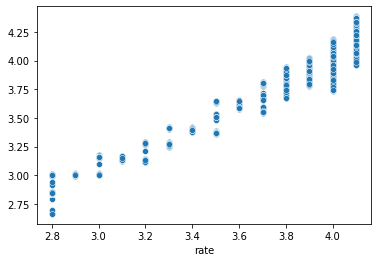

In [346]:
sns.scatterplot(y_test,prediction)

In [347]:
import pickle

In [348]:
file=open('/content/drive/MyDrive/Projects/INEURON/Restaurant Rating Prediction/regression_Model.pkl','wb')

In [349]:
#droping information to that file

pickle.dump(regr,file)

# MODEL DEPLOYMENT USING STREAM LIT

In [350]:
!pip install -q streamlit
!pip install -q pyngrok
!pip install -q streamlit_ace

In [351]:
%%writefile app.py


import pickle
import streamlit as st

 
#loading the model
pickle_in = open('regression_Model.pkl', 'rb')
classifier = pickle.load(pickle_in)
 
@st.cache()
def Home():
    return render_template('index.html')
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(online_order,book_table,votes,approx_cost,Overall_review,listed_in):   
 
    if online_order == "yes":
        online_order = 1
    else:
        online_order = 0
 
    if book_table == "yes":
        book_table = 0
    else:
        book_table = 1

    if Overall_review == "0.0":
       Overall_review = 0
    elif Overall_review == '1.0':
        Overall_review = 1
    elif Overall_review == '2.0':
        Overall_review = 2
    elif Overall_review == '3.0':
        Overall_review = 3
    elif Overall_review == '4.0':
        Overall_review = 4
    else:
      Overall_review = 5
      
    if listed_in == "Buffet":
        listed_in = 0
    elif listed_in == "Cafes":
        listed_in = 1
    elif listed_in == "Delivery":
        listed_in = 2
    elif listed_in == "Desserts":
        listed_in = 3
    elif listed_in == "Dine-out":
        listed_in = 4
    elif listed_in == "Drinks & nightlife":
        listed_in = 5
    else:
        listed_in = 6  
 
 
    # Making predictions 
    prediction = classifier.predict( 
        [[online_order,book_table,votes,approx_cost,Overall_review,listed_in]])
    
    return prediction
     
    
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:green;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Automated Loan Prediction App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    online_order = st.selectbox('online_order',("yes","no"))
    book_table = st.selectbox('book_table',("yes","no")) 
    Overall_review  = st.selectbox('Overall_review',("0.0","1.0","2.0","3.0","4.0","5.0"))
    votes = st.number_input("votes") 
    approx_cost = st.number_input("approx_cost")
    listed_in = st.selectbox('listed_in',('Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars'))
    
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(online_order,book_table,votes,approx_cost,Overall_review,listed_in) 
        st.success('Your loan is {}',result)
        
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [352]:
!streamlit run app.py &>/dev/null&

In [353]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://2914-34-66-80-183.ngrok.io" -> "http://localhost:8501">

In [354]:
# RUN THIS CELL IF YOU WANT TO KILL ANY TUNNELS WHICH ARE RUNNING ON YOUR ID
#ngrok.kill()